In [5]:
import numpy as np
from pymatching import Matching
import matplotlib.pyplot as plt
from scipy import sparse, linalg
import CompassCodes as cc
import stim 
import pandas as pd
from compass_code_correlated_error import depolarizing_err


In [68]:
surface_code_circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=1,
    distance=3,
    # after_clifford_depolarization=0.001,
    # after_reset_flip_probability=0.001,
    before_measure_flip_probability=0.001)
    # before_round_data_depolarization=0.001)

In [69]:
print(repr(surface_code_circuit))

stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TICK
    H 2 11 16 25
    TICK
    X_ERROR(0.001) 2 9 11 13 14 16 18 25
    MR 2 9 11 13 14 16 18 25
    DETECTOR(0, 4, 0) rec[-4]
    DETECTOR(2, 2, 0) rec[-7]
    DETECTOR(4, 4, 0) rec[-2]
    DETECTOR(6, 2, 0) rec[-5]
    X_ERROR(0.001) 1 3 5 8 10 12 15 17 19
    M 1 3 5

In [12]:
sc_no_err = stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TICK
    H 2 11 16 25
    TICK
    MR 2 9 11 13 14 16 18 25
    DETECTOR(0, 4, 0) rec[-4]
    DETECTOR(2, 2, 0) rec[-7]
    DETECTOR(4, 4, 0) rec[-2]
    DETECTOR(6, 2, 0) rec[-5]
    M 1 3 5 8 10 12 15 17 19
    DETECTOR(0, 4, 1) rec[-3] rec[-6] rec[-13]
    DETECTOR(2, 2, 1) rec[-5] rec[-6] rec[-8] rec[-9] rec[-16]
    DETECTOR(4, 4, 1) rec[-1] rec[-2] rec[-4] rec[-5] rec[-11]
    DETECTOR(6, 2, 1) rec[-4] rec[-7] rec[-14]
    OBSERVABLE_INCLUDE(0) rec[-7] rec[-8] rec[-9]
''')

In [78]:
sc_err = stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TICK
    H 2 11 16 25
    TICK
    X_ERROR(0.001) 2 9 11 13 14 16 18 25
    MR 2 9 11 13 14 16 18 25
    DETECTOR rec[-4]
    DETECTOR rec[-7]
    DETECTOR rec[-2]
    DETECTOR rec[-5]
    X_ERROR(0.001) 1 3 5 8 10 12 15 17 19
    M 1 3 5 8 10 12 15 17 19
    DETECTOR rec[-3] rec[-6] rec[-13]
    DETECTOR rec[-5] rec[-6] rec[-8] rec[-9] rec[-16]
    DETECTOR rec[-1] rec[-2] rec[-4] rec[-5] rec[-11]
    DETECTOR rec[-4] rec[-7] rec[-14]
    OBSERVABLE_INCLUDE(0) rec[-7] rec[-8] rec[-9]
''')

<pymatching.Matching object with 8 detectors, 0 boundary nodes, and 11 edges>


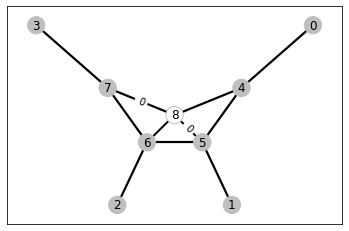

In [79]:
matching_from_c = Matching.from_stim_circuit(sc_err)
matching_from_c.draw()
print(matching_from_c)

In [88]:
def make_circuit_from_parity_mat(H_x, H_z):
    """ Given a parity check matrix pair, generates a STIM circuit and detectors to implement the outlined code.
        Inputs:
            H - (scipy sparse mat) the parity check matrix
            Type - str - type == "X" is the X parity check matrix and produces those stabilizers
                         type == "Z" ' ' 
        Returns: (Stim circuit object) the circuit corresponding to the checks of the specified code

        Note - the X and Z circuits can be seperated in code-capacity model. Circuit level model will
                require integrating the circuits to avoid hook errors. See fig 3. of this paper: 
                https://arxiv.org/pdf/1404.3747
        TODO: change this function for non-CSS codes - how do I do this generally
    """
    # initialize circuit
    circuit = stim.Circuit()

    curr_ancilla = 0
    num_ancillas = H_x.shape[0] 



    #create the X parity checks
    rows, cols, values = sparse.find(H_x)
    data_qubits = []
    for row in range(H_x.shape[0]):
        
        # Get the slice of the data corresponding to the current row
        row_start = H_x.indptr[row]
        row_end = H_x.indptr[row + 1]

        # Extract the column indices and data values for this row
        curr_cols = cols[row_start:row_end] 
        # get the order of the qubits for the surface code
        mid_qubit = len(curr_cols)//2
        first_half = curr_cols[0:mid_qubit]
        second_half = curr_cols[mid_qubit:]
        if len(curr_cols) == 4:
            sorted_qubits = np.append(np.sort(first_half)[::-1], np.sort(second_half)[::-1])
        else:
            sorted_qubits = np.append(np.sort(second_half)[::-1], np.sort(first_half)[::-1])

        
        
        # initialize the circuit
        circuit.append("R", curr_ancilla)
        circuit.append("RX", [q + num_ancillas for q in sorted_qubits])


        circuit.append("H", curr_ancilla)

        for qubit in sorted_qubits:
            circuit.append("CX", [curr_ancilla, qubit + num_ancillas])
        circuit.append("H", curr_ancilla)
        circuit.append("X_ERROR", curr_ancilla, 0.001)
        circuit.append("MR", curr_ancilla)
        circuit.append("DETECTOR", stim.target_rec(-1))
        circuit.append("X_ERROR", [q + num_ancillas for q in sorted_qubits], 0.001)
        circuit.append("MX", [q + num_ancillas for q in sorted_qubits])
        circuit.append("DETECTOR", [stim.target_rec(-i - 1) for i in range(len(curr_cols))] + [stim.target_rec(-len(curr_cols) - 1)])
    return circuit

In [89]:
d = 3
l = 2

compass_code = cc.CompassCode(d=d, l=l)
H_x, H_z = compass_code.H['X'], compass_code.H['Z']
log_x, log_z = compass_code.logicals['X'], compass_code.logicals['Z']

my_c = make_circuit_from_parity_mat(H_x, H_z)
print(repr(my_c))

stim.Circuit('''
    R 0
    RX 5 4 6 5
    H 0
    CX 0 5 0 4 0 6 0 5
    H 0
    X_ERROR(0.001) 0
    MR 0
    DETECTOR rec[-1]
    X_ERROR(0.001) 5 4 6 5
    MX 5 4 6 5
    DETECTOR rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]
    R 0
    RX 8 7
    H 0
    CX 0 8 0 7
    H 0
    X_ERROR(0.001) 0
    MR 0
    DETECTOR rec[-1]
    X_ERROR(0.001) 8 7
    MX 8 7
    DETECTOR rec[-1] rec[-2] rec[-3]
    R 0
    RX 9 8
    H 0
    CX 0 9 0 8
    H 0
    X_ERROR(0.001) 0
    MR 0
    DETECTOR rec[-1]
    X_ERROR(0.001) 9 8
    MX 9 8
    DETECTOR rec[-1] rec[-2] rec[-3]
    R 0
    RX 11 10 12 11
    H 0
    CX 0 11 0 10 0 12 0 11
    H 0
    X_ERROR(0.001) 0
    MR 0
    DETECTOR rec[-1]
    X_ERROR(0.001) 11 10 12 11
    MX 11 10 12 11
    DETECTOR rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]
''')


<pymatching.Matching object with 8 detectors, 0 boundary nodes, and 4 edges>


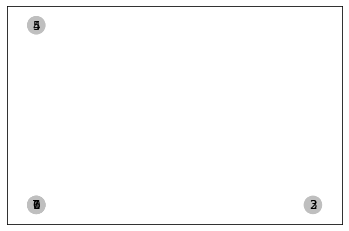

In [90]:
matching_my_c = Matching.from_stim_circuit(my_c)
matching_my_c.draw()
print(matching_my_c)

matching_from_p = Matching.from_check_matrix(H_x)

ValueError: x and y must have same first dimension, but have shapes (40,) and (0,)

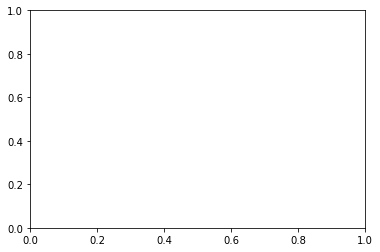

In [84]:
num_errors_p = []
num_errors_c = []
shots = 1000
eta = 0.5
p_list = np.linspace(0.01, 0.5, 40)

for p in p_list:
    err_vec = [depolarizing_err(p, H_x, eta=eta) for _ in range(shots)]
    err_vec_x = np.array([err[0] for err in err_vec])
    err_vec_z = np.array([err[1] for err in err_vec])

    # generate the syndrome for each shot
    # syndrome_shots = err_vec_z@H_x.T%2
    sampler = my_c.compile_detector_sampler()
    syndrome, actual_observables = sampler.sample(shots=shots, separate_observables=True)

    # the correction to the errors
    # correction_p = matching_from_p.decode_batch(syndrome_shots)
    correction_c = matching_from_c.decode_batch(syndrome)

    # num_errors_p += [np.sum((correction_p+err_vec_z)@log_x%2)]
    # num_errors_c += [np.sum((correction_c+err_vec_z)@log_x%2)]
    num_errors_c += np.sum(np.any(correction_c != actual_observables, axis=1))
# plt.plot(p_list,num_errors_p, label="parity H" )
plt.plot(p_list, num_errors_c, label="circuit")

plt.show()